In [ ]:
import numpy as np
import time
import pandas as pd

In [ ]:
from permutationTest import GrennPdistOpenMP, GrennPdist, coinShiftPdist

In [ ]:
from permutationTestCuda import greenCUDA

In [ ]:
#from significance_of_mean_cuda import significance_of_mean_cuda

In [ ]:
import time

In [ ]:
import numpy as np

In [ ]:
def getDataCoinShift(A,B):
    scores = np.concatenate((A,B))
    n = scores.shape[0]
    m = A.shape[0]

    add = np.min(scores - 1)
    scores = scores - add

    m_b = sum(np.sort(scores)[(n - m) :n])

    score_a = np.ones(n, dtype=np.int32)


    im_a = m
    im_b = m_b

    return score_a,scores,im_a, im_b 

def getDataGreen(A,B):
    x = A
    y = B
    m = x.shape[0]
    n = y.shape[0]
    
    z = np.concatenate((A,B))
    z.sort()
    z = z - min(z)
    S = z[m:].sum()
      
    return z, m, n, S

def get_p(pdist,a):
    p = pdist[(a-min(a)).sum():].sum()
    p = 2 * min( p, (1-p))
    return p

In [8]:
all_time_coinC = list()
all_time_greenC = list()
all_time_greenMTC = list()
all_time_greenNumba = list()
all_time_coinR = list()
N = [50,100,150,200,250,300,350,400,450,500]
for n in N:
    time_coinC = list()
    time_greenC = list()
    time_greenMTC = list()
    time_greenNumba = list()
    time_coinR = list()

    A_list = np.asarray([np.random.randint(0,n,n,dtype=np.int32) for _ in range(1)])
    B_list = np.asarray([np.random.randint(0,n,n,dtype=np.int32) for _ in range(1)])
    for A,B in zip(A_list,B_list):
        start = time.time()
        d0 = np.array(coinShiftPdist(*getDataCoinShift(A,B)))
        end = time.time()
        time_coinC.append(end - start)

    
        start = time.time()
        d1 = GrennPdist(*getDataGreen(A,B))
        end = time.time()
        time_greenC.append(end - start)

    
    
        start = time.time()
        d2 = np.array(GrennPdistOpenMP(*getDataGreen(A,B)))
        end = time.time()
        time_greenMTC.append(end - start)

    
        start = time.time()
        d2 = np.array(greenCUDA(*getDataGreen(A,B)))
        end = time.time()
        time_greenNumba.append(end - start)

    
    
        
        
    all_time_coinC.append(time_coinC)
    all_time_greenC.append(time_greenC)
    all_time_greenMTC.append(time_greenMTC)
    all_time_greenNumba.append(time_greenNumba)


    

In [12]:
import matplotlib.pyplot as plt

In [15]:
mean_time_coinC = np.mean(all_time_coinC,1)
mean_time_greenC = np.mean(all_time_greenC,1)
mean_time_greenMTC = np.mean(all_time_greenMTC,1)
mean_time_greenNumba = np.mean(all_time_greenNumba,1)

Text(0, 0.5, 'Time(s)')

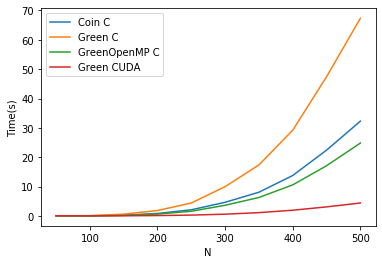

In [16]:
plt.plot(N,mean_time_coinC, label="Coin C")
plt.plot(N,mean_time_greenC, label="Green C")
plt.plot(N,mean_time_greenMTC, label="GreenOpenMP C")
plt.plot(N,mean_time_greenNumba, label="Green CUDA")

plt.legend(loc="upper left")
plt.xlabel("N")
plt.ylabel("Time(s)")